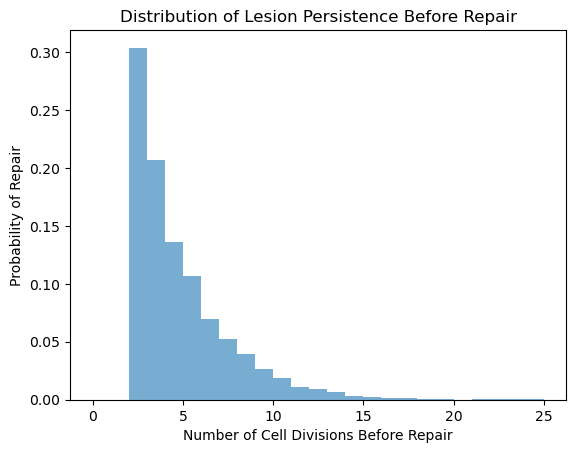

Mean persistence: 4.35
Variance of persistence: 7.63


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_DNA_lesion_persistence(p, n_simulations=1000):
    persistence_duration = []
    
    for _ in range(n_simulations): 
        divisions = 1
        while True:
            divisions += 1
            if np.random.rand() < p:
                break
        persistence_duration.append(divisions)
    
    return persistence_duration

# Example usage:
p = 0.3  # Repair probability
results = simulate_DNA_lesion_persistence(p, 10000)

# Plot
plt.hist(results, bins=range(0, max(results)+1), density=True, alpha=0.6)
plt.title("Distribution of Lesion Persistence Before Repair")
plt.xlabel("Number of Cell Divisions Before Repair")
plt.ylabel("Probability of Repair")
plt.show()

# Compute statistics
mean_persistence = np.mean(results)
variance_persistence = np.var(results)

print(f"Mean persistence: {mean_persistence:.2f}")
print(f"Variance of persistence: {variance_persistence:.2f}")

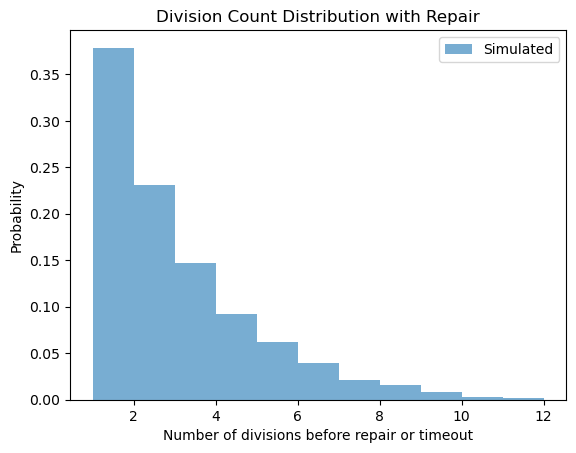

Mean number of divisions: 2.60
Variance: 3.60


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

rng = np.random.default_rng()

# Parameters
nTrials = 5000
mitRate = 0.5 # division rate (λ)
T= 10          # end time
rho = 0.3      # repair rate

# Exponential-based repair probability 
def repair_probability(rho, deltaT):
    return 1 - np.exp(-rho * deltaT)

# experiment: track divisions until repair or end time
def experiment_with_repair(mitRate, T, rho):
    t = 0
    nDivisions = 1
    
    while True:
        deltaT = rng.exponential(1 / mitRate)
        t += deltaT #t+divisiontime
        
        if t > T:
            break  # end of time reached (stop limit exceeds)
        
        # Check for repair (Bernoulli trial)
        if rng.uniform() < repair_probability(rho, deltaT): #Generates a random number between 0 and 1, “With this probability, the repair occurs.”
            
            break
        
        nDivisions += 1  # no repair, continue
    
    return nDivisions

# Run trials
experimentResults = [experiment_with_repair(mitRate, T, rho) for _ in range(nTrials)] #Repeat the division + repair process nTrials times. 

# Plot histogram
plt.hist(experimentResults, bins=range(1, max(experimentResults)+1), density=True, alpha=0.6, label='Simulated')


plt.xlabel("Number of divisions before repair or timeout")
plt.ylabel("Probability")
plt.title("Division Count Distribution with Repair")
plt.legend()
plt.show()

mean_divs = np.mean(experimentResults)
var_divs = np.var(experimentResults)
print(f"Mean number of divisions: {mean_divs:.2f}")
print(f"Variance: {var_divs:.2f}")


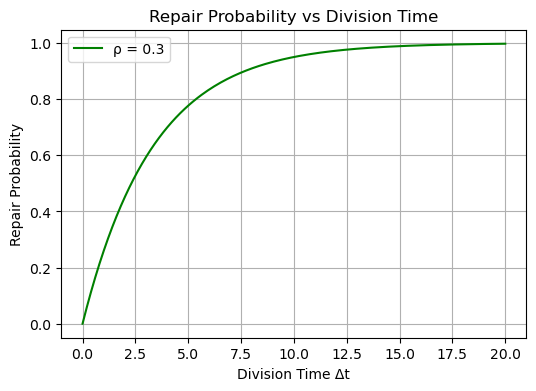

In [6]:
# Time range (possible division times)
deltaT_range = np.linspace(0, 20, 200)

# Corresponding repair probabilities
repair_probs = [repair_probability(rho, deltaT) for deltaT in deltaT_range]

plt.figure(figsize=(6, 4))
plt.plot(deltaT_range, repair_probs, label=f'ρ = {rho}', color='green')
plt.xlabel("Division Time Δt")
plt.ylabel("Repair Probability")
plt.title("Repair Probability vs Division Time")
plt.grid(True)
plt.legend()
plt.show()


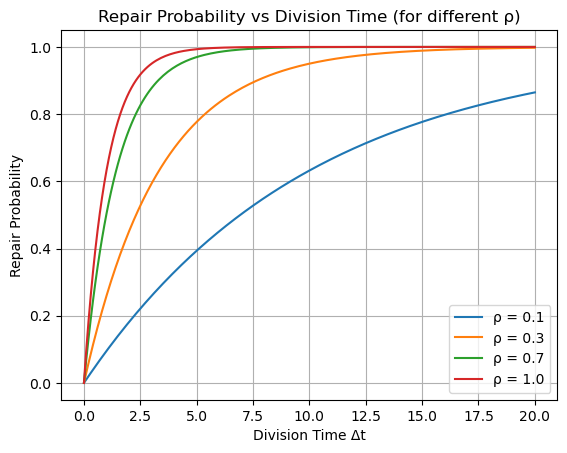

In [7]:
rhos = [0.1, 0.3, 0.7, 1.0]
for rho_val in rhos:
    repair_probs = [repair_probability(rho_val, dt) for dt in deltaT_range]
    plt.plot(deltaT_range, repair_probs, label=f'ρ = {rho_val}')

plt.xlabel("Division Time Δt")
plt.ylabel("Repair Probability")
plt.title("Repair Probability vs Division Time (for different ρ)")
plt.legend()
plt.grid(True)
plt.show()


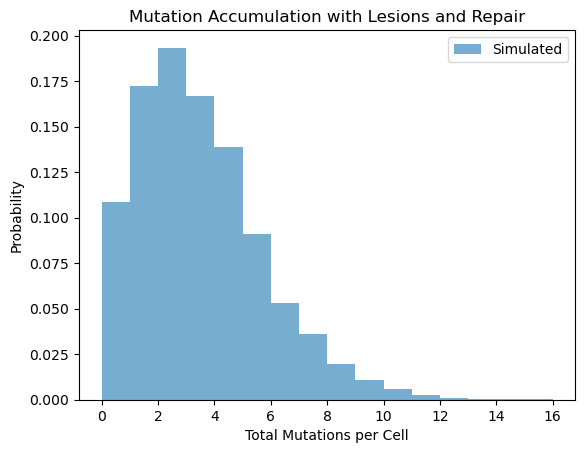

In [41]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

# Parameters
nTrials = 5000      
mitRate = 0.5        # division rate (λ)
T = 10               # end time
lesionRate = 2.0     # avg lesions per division (λ_lesions)
rho = 0.3           # repair rate 

def simulate_cell(mitRate, T, lesionRate, rho):
    t = 0
    mutations = 0
    
    while t < T:
        # Time to next division
        deltaT = rng.exponential(1 / mitRate)
        t += deltaT
        
        if t > T:
            break  # end time reached
        
        # Lesions acquired this division
        lesions = rng.poisson(lesionRate) #Each division produces a random number of lesions, drawn from Poisson.
        
        # Repairs → mutations
        repairs = rng.binomial(lesions, rho) #Each lesion has a chance rho to become a mutation.
        mutations += repairs
    
    return mutations 

# Run trials
mutationCounts = [simulate_cell(mitRate, T, lesionRate, rho) for _ in range(nTrials)]

# Plot histogram
plt.hist(mutationCounts, bins=range(0, max(mutationCounts)+1), density=True, alpha=0.6, label='Simulated')
plt.xlabel("Total Mutations per Cell")
plt.ylabel("Probability")
plt.title("Mutation Accumulation with Lesions and Repair")
plt.legend()
plt.show()